# Assignment 8

Gene expression data is highly dynamic and temporal. In this assignment, you will compare two deep learning approaches—an LSTM model and an Attention-based model—to classify gene expression patterns. You will use three synthetic gene expression datasets, each with a different sequence length (100, 200, and 300 time steps). Additionally, you will perform grid search hyperparameter tuning to find the best model configurations for each architecture.

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# tf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add
from tensorflow.keras.optimizers import Adam

# Q1: Data Preparation [1 pts]

● Load each CSV file and reshape the data to match the input requirements of your
models, i.e., a 3D array of shape (num_samples, num_time_steps, num_genes).

● Split the data into training and testing sets (80/20 split).

In [17]:
# import data
# 1000 samples, 100 time steps, 10 gene features per time step
# last column is label
gene_100_data = pd.read_csv('/Users/peytonhall/Documents/spring_2025/qbio_465/assignment_08/gene_expression_data_100.csv')

# 1000 samples, 200 time steps, 10 gene features per time step
# last column is label
gene_200_data = pd.read_csv('/Users/peytonhall/Documents/spring_2025/qbio_465/assignment_08/gene_expression_data_200.csv')

# 1000 samples, 300 time steps, 10 gene features per time step
# last column is label
gene_300_data = pd.read_csv('/Users/peytonhall/Documents/spring_2025/qbio_465/assignment_08/gene_expression_data_300.csv')

In [18]:
# reshape into a 3d shape
# sep into x and y then reshape 100
X_100 = gene_100_data.iloc[:, :-1].values
y_100 = gene_100_data.iloc[:, -1].values

# reshaped_100 = X_100.reshape((1000, 100, 10))

# sep into x and y then reshape 100
X_200 = gene_200_data.iloc[:, :-1].values
y_200 = gene_200_data.iloc[:, -1].values

# reshaped_200 = X_200.reshape((1000, 200, 10))

# sep into x and y then reshape 100
X_300 = gene_300_data.iloc[:, :-1].values
y_300 = gene_300_data.iloc[:, -1].values

# reshaped_300 = X_300.reshape((1000, 300, 10))

In [19]:
# split into training and testing
# split 100
train_X_100, test_X_100, train_y_100, test_y_100 = train_test_split(X_100, y_100, test_size=0.2, random_state=42)
# make sure it's in 3d for lstm
train_X_100 = train_X_100.reshape((train_X_100.shape[0], 100, 10))
test_X_100 = test_X_100.reshape((test_X_100.shape[0], 100, 10))

# split 200
train_X_200, test_X_200, train_y_200, test_y_200 = train_test_split(X_200, y_200, test_size=0.2, random_state=42)
train_X_200 = train_X_200.reshape((train_X_200.shape[0], 200, 10))
test_X_200 = test_X_200.reshape((test_X_200.shape[0], 200, 10))

# split 300
train_X_300, test_X_300, train_y_300, test_y_300 = train_test_split(X_300, y_300, test_size=0.2, random_state=42)
train_X_300 = train_X_300.reshape((train_X_100.shape[0], 300, 10))
test_X_300 = test_X_300.reshape((test_X_300.shape[0], 300, 10))

In [20]:
test_X_100.shape

(200, 100, 10)

# Q2: LSTM Model Implementation [1 pts]

● Build an LSTM model that accepts input of shape (num_time_steps, num_genes)
and outputs a binary classification.

● Develop a grid search procedure to tune key hyperparameters (e.g., number of LSTM
units, dropout rate, batch size, learning rate, etc.). You may choose which
hyperparameters to tune. To reduce computational cost, perform the hyperparameter
search using only the gene_expression_data_100.csv dataset.

● Report the best hyperparameter configuration for the model and discuss the impact of
hyperparameter tuning via grid search on the model’s performance.

In [4]:
def build_lstm_funct(input_shape, lstm_units, dropout_rate, learning_rate):
    model = Sequential()
    model.add(LSTM(units=lstm_units, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    # for binary classification 
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

In [22]:
# use model w/o gridsearch
input_shape_100 = train_X_100.shape[1:]
# shape is 100, 10 (100 time steps, 10 features per step)

In [23]:
model_100 = build_lstm_funct(
    input_shape=input_shape_100, 
    lstm_units=64,
    dropout_rate=0.2,
    learning_rate=0.01
)

# train model
history_100 = model_100.fit(
    train_X_100, train_y_100,
    validation_split=0.2,
    epochs=20,
    batch_size=32
)

# evaluate
test_100_loss, test_100_acc = model_100.evaluate(test_X_100, test_y_100)
print(f"Test accuracy for 100 time steps: {test_100_acc:.3f}")
print(f"Test loss for 100 time steps: {test_100_loss:.3f}")

Epoch 1/20


/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5672 - loss: 0.6815 - val_accuracy: 0.4812 - val_loss: 0.7078
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6298 - loss: 0.6524 - val_accuracy: 0.6062 - val_loss: 0.6728
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6249 - loss: 0.6521 - val_accuracy: 0.6500 - val_loss: 0.6663
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6390 - loss: 0.6436 - val_accuracy: 0.6562 - val_loss: 0.6431
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6756 - loss: 0.6008 - val_accuracy: 0.5938 - val_loss: 0.6565
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6228 - loss: 0.6584 - val_accuracy: 0.4875 - val_loss: 0.7175
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6554 - loss: 0.6343 - val_accuracy: 0.6625 - val_loss: 0.6588
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6814 - loss: 0.6351 - val_accuracy: 0.6125 - val_loss: 0.

In [25]:
# grid search
# param grid
param_grid = {
    'lstm_units' : [32, 64, 128], 
    'dropout_rate': [0.2, 0.3, 0.5], 
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128]
}

# initialize
best_score = 0
best_params = {}

for lstm_units in param_grid['lstm_units']:
    for dropout_rate in param_grid['dropout_rate']:
        for learning_rate in param_grid['learning_rate']:
            for batch_size in param_grid['batch_size']:
                model_100_hp = build_lstm_funct(
                    input_shape=input_shape_100,
                    lstm_units=lstm_units,
                    dropout_rate=dropout_rate,
                    learning_rate=learning_rate)
                
                history_100 = model_100_hp.fit(
                    train_X_100, train_y_100,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=batch_size
                )
                
                test_100_loss_hp, test_100_acc_hp = model_100_hp.evaluate(test_X_100, test_y_100)
                
                # for first, test_acc greater than 0, should give best hps based on that
                if test_100_acc_hp > best_score:
                    best_score = test_100_acc_hp
                    best_params = {
                        'lstm_units': lstm_units,
                        'dropout_rate': dropout_rate,
                        'learning_rate': learning_rate,
                        'batch_size': batch_size
                    }
                    
print(f"Best hyperparameters: {best_params}")  
print(f"Best test accuracy: {best_score:.3f}")
                

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5119 - loss: 0.6947 - val_accuracy: 0.4688 - val_loss: 0.6945
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5771 - loss: 0.6833 - val_accuracy: 0.4750 - val_loss: 0.6923
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5749 - loss: 0.6778 - val_accuracy: 0.5312 - val_loss: 0.6851
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6162 - loss: 0.6649 - val_accuracy: 0.5250 - val_loss: 0.6794
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6414 - loss: 0.6317 - val_accuracy: 0.6687 - val_loss: 0.6182
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6924 - loss: 0.6241 - val_accuracy: 0.6438 - val_loss: 0.6362
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7216 - loss: 0.5764 - val_accuracy: 0.6625 - val_loss: 0.6094
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7132 - loss: 0.5740 - val_accuracy: 0.6313 - v

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7619 - loss: 0.4890 - val_accuracy: 0.6187 - val_loss: 0.7198
Epoch 20/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7913 - loss: 0.4342 - val_accuracy: 0.6187 - val_loss: 0.7338
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6011 - loss: 0.7977 
Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5038 - loss: 0.6927 - val_accuracy: 0.4563 - val_loss: 0.6961
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5791 - loss: 0.6695 - val_accuracy: 0.4812 - val_loss: 1.0795
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6488 - loss: 0.7223 - val_accuracy: 0.6250 - val_loss: 0.6402
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6299 - loss: 0.6465 - val_accuracy: 0.6313 - val_loss: 0.6357
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6855 - loss: 0.6164 - val_accuracy: 0.6313 - val_loss: 0.6472
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6894 - loss: 0.5607 - val_accuracy: 0.6812 - val_loss: 0.6015
Epoch 18/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7259 - loss: 0.5430 - val_accuracy: 0.6625 - val_loss: 0.6266
Epoch 19/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7373 - loss: 0.5326 - val_accuracy: 0.6875 - val_loss: 0.6348
Epoch 20/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7441 - loss: 0.5157 - val_accuracy: 0.6812 - val_loss: 0.6100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6142 - loss: 0.6780  
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5466 - loss: 0.6926 - val_accuracy: 0.5250 - val_loss: 0.6864
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5745 - loss: 0.6849 - val_accuracy: 0.5063 - val_loss: 0.6865
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5383 - loss: 0.6867 - val_accuracy: 0.5000 - val_loss: 0.6872
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6940 - loss: 0.5867 - val_accuracy: 0.6562 - val_loss: 0.6484
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7049 - loss: 0.5778 - val_accuracy: 0.6438 - val_loss: 0.7170
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7446 - loss: 0.5280 - val_accuracy: 0.6438 - val_loss: 0.6874
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7374 - loss: 0.5271 - val_accuracy: 0.6313 - val_loss: 0.7340
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7751 - loss: 0.4781 - val_accuracy: 0.7063 - val_loss: 0.6400
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7974 - loss: 0.4547 - val_accuracy: 0.6313 - val_loss: 0.6878
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8476 - loss: 0.3816 - val_accuracy: 0.6250 - val_loss: 0.7901
Epoch 13/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8295 - loss: 0.3982 - val_accuracy: 0.5750 - val_loss

Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6357 - loss: 0.6476 - val_accuracy: 0.5000 - val_loss: 0.7038
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6354 - loss: 0.6747 - val_accuracy: 0.5250 - val_loss: 0.6892
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6433 - loss: 0.6358 - val_accuracy: 0.5250 - val_loss: 0.7410
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7403 - loss: 0.5534 - val_accuracy: 0.5562 - val_loss: 0.7505
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7836 - loss: 0.4941 - val_accuracy: 0.5125 - val_loss: 0.8456
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8132 - loss: 0.4077 - val_accuracy: 0.5250 - val_loss: 0.8862
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8506 - loss: 0.3677 - val_accuracy: 0.4938 - val_loss: 0.9589
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7974 - loss: 0.4293 - val_accuracy: 0.5063 - val_loss: 0.936

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6476 - loss: 0.6648 - val_accuracy: 0.6375 - val_loss: 0.6613
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6441 - loss: 0.6490 - val_accuracy: 0.4938 - val_loss: 0.6973
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5886 - loss: 0.6642 - val_accuracy: 0.5750 - val_loss: 0.6879
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6544 - loss: 0.6312 - val_accuracy: 0.6250 - val_loss: 0.6299
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6987 - loss: 0.5874 - val_accuracy: 0.6250 - val_loss: 0.6544
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6955 - loss: 0.6114 - val_accuracy: 0.6375 - val_loss: 0.6942
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7277 - loss: 0.5667 - val_accuracy: 0.6500 - val_loss: 0.6439
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6874 - loss: 0.5881 - val_accuracy: 0.6313 - val_loss: 0.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5375 - loss: 0.7199 - val_accuracy: 0.4875 - val_loss: 0.7254
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5121 - loss: 0.7093 
Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5056 - loss: 0.6939 - val_accuracy: 0.5688 - val_loss: 0.6855
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5966 - loss: 0.6721 - val_accuracy: 0.5688 - val_loss: 0.6725
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6593 - loss: 0.6302 - val_accuracy: 0.6250 - val_loss: 0.6536
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6902 - loss: 0.6062 - val_accuracy: 0.6500 - val_loss: 0.6188
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6653 - loss: 0.6227 - val_accuracy: 0.6438 - val_loss: 0.6207
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6952 - loss: 0.6049 - val_accuracy: 0.6313 - val_loss: 0.6574
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step -

Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7161 - loss: 0.5835 - val_accuracy: 0.6687 - val_loss: 0.6191
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6974 - loss: 0.5794 - val_accuracy: 0.6875 - val_loss: 0.5927
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6773 - loss: 0.5998 - val_accuracy: 0.6812 - val_loss: 0.6280
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6866 - loss: 0.5826 - val_accuracy: 0.6500 - val_loss: 0.6101
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6911 - loss: 0.5714 - val_accuracy: 0.6875 - val_loss: 0.6052
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7182 - loss: 0.5555 - val_accuracy: 0.6812 - val_loss: 0.6101
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7135 - loss: 0.5708 - val_accuracy: 0.6500 - val_loss: 0.6127
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7123 - loss: 0.5724 - val_accuracy: 0.6500 - val_loss: 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5540 - loss: 0.6840 - val_accuracy: 0.4500 - val_loss: 0.7493
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5441 - loss: 0.6917 - val_accuracy: 0.4500 - val_loss: 0.7309
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5516 - loss: 0.6876 - val_accuracy: 0.4750 - val_loss: 0.7114
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5833 - loss: 0.6717 - val_accuracy: 0.4875 - val_loss: 0.7304
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5726 - loss: 0.6748 - val_accuracy: 0.4688 - val_loss: 0.7662
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6156 - loss: 0.6733 - val_accuracy: 0.5063 - val_loss: 0.7014
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5385 - loss: 0.6618 - val_accuracy: 0.5250 - val_loss: 0.7069
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5838 - loss: 0.6432 - val_accuracy: 0.4563 - val_los

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6927 - loss: 0.6138 - val_accuracy: 0.5688 - val_loss: 0.6961
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6725 - loss: 0.6153 - val_accuracy: 0.5813 - val_loss: 0.6707
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6668 - loss: 0.6136 - val_accuracy: 0.6313 - val_loss: 0.6573
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6986 - loss: 0.5986 - val_accuracy: 0.6187 - val_loss: 0.6526
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7353 - loss: 0.5674 - val_accuracy: 0.6375 - val_loss: 0.6667
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7416 - loss: 0.5559 - val_accuracy: 0.6250 - val_loss: 0.6528
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7819 - loss: 0.4621 - val_accuracy: 0.5250 - val_loss: 0.7415
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7819 - loss: 0.4614 - val_accuracy: 0.6187 - val_loss:

Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4678 - loss: 0.8249 - val_accuracy: 0.4500 - val_loss: 0.8726
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5587 - loss: 0.7425 - val_accuracy: 0.5500 - val_loss: 0.7044
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4645 - loss: 0.7587 - val_accuracy: 0.4500 - val_loss: 0.7928
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5479 - loss: 0.7302 - val_accuracy: 0.5063 - val_loss: 0.7057
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4833 - loss: 0.7014 - val_accuracy: 0.4688 - val_loss: 0.7150
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5460 - loss: 0.7045 - val_accuracy: 0.4688 - val_loss: 0.7003
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5360 - loss: 0.6995 - val_accuracy: 0.4563 - val_loss: 0.7018
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5410 - loss: 0.6986 - val_accuracy: 0.4500 - val_loss: 0.7296

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5292 - loss: 0.6919 - val_accuracy: 0.6313 - val_loss: 0.6388
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6250 - loss: 0.6564 - val_accuracy: 0.5375 - val_loss: 0.6899
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6371 - loss: 0.6465 - val_accuracy: 0.6938 - val_loss: 0.5917
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6681 - loss: 0.6404 - val_accuracy: 0.6313 - val_loss: 0.6494
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6952 - loss: 0.6216 - val_accuracy: 0.6313 - val_loss: 0.6454
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6537 - loss: 0.6214 - val_accuracy: 0.5625 - val_loss: 0.6794
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6568 - loss: 0.6502 - val_accuracy: 0.6375 - val_loss: 0.6591
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6043 - loss: 0.6467 - val_accuracy: 0.5875 - val_loss: 0.

Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6233 - loss: 0.6299 - val_accuracy: 0.4688 - val_loss: 0.8219
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6522 - loss: 0.6240 - val_accuracy: 0.4938 - val_loss: 0.7807
Epoch 13/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6249 - loss: 0.6414 - val_accuracy: 0.4812 - val_loss: 0.8105
Epoch 14/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7114 - loss: 0.5603 - val_accuracy: 0.4750 - val_loss: 0.8715
Epoch 15/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7187 - loss: 0.5449 - val_accuracy: 0.5063 - val_loss: 0.8142
Epoch 16/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6882 - loss: 0.5864 - val_accuracy: 0.4437 - val_loss: 0.9228
Epoch 17/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5879 - loss: 0.7331 - val_accuracy: 0.4313 - val_loss: 0.7826
Epoch 18/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5681 - loss: 0.6888 - val_accuracy: 0.

Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.7040 - loss: 0.5855 - val_accuracy: 0.6875 - val_loss: 0.6001
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.6764 - loss: 0.5977 - val_accuracy: 0.6562 - val_loss: 0.6130
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.6849 - loss: 0.5793 - val_accuracy: 0.6500 - val_loss: 0.6445
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.6944 - loss: 0.5666 - val_accuracy: 0.7000 - val_loss: 0.5978
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.7086 - loss: 0.5635 - val_accuracy: 0.6938 - val_loss: 0.6068
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.6930 - loss: 0.5654 - val_accuracy: 0.7000 - val_loss: 0.6062
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.7005 - loss: 0.5822 - val_accuracy: 0.7125 - val_loss: 0.6001
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.6922 - loss: 0.5734 - val_accuracy: 0.7063 - va

Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4921 - loss: 0.7218 - val_accuracy: 0.5500 - val_loss: 0.6924
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4920 - loss: 0.7473 - val_accuracy: 0.4500 - val_loss: 0.7179
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4843 - loss: 0.7524 - val_accuracy: 0.4500 - val_loss: 0.7236
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5502 - loss: 0.7059 - val_accuracy: 0.5500 - val_loss: 0.6914
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5288 - loss: 0.7101 - val_accuracy: 0.4500 - val_loss: 0.8268
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.5003 - loss: 0.7506 - val_accuracy: 0.5500 - val_loss: 0.6896
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5042 - loss: 0.7357 - val_accuracy: 0.4500 - val_loss: 0.7167
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5277 - loss: 0.6990 - val_accuracy: 0.450

Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5252 - loss: 0.7015 - val_accuracy: 0.4500 - val_loss: 0.7273
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5057 - loss: 0.6981 - val_accuracy: 0.4500 - val_loss: 0.7161
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5391 - loss: 0.6950 - val_accuracy: 0.4500 - val_loss: 0.6975
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5362 - loss: 0.7084 - val_accuracy: 0.5375 - val_loss: 0.6891
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5351 - loss: 0.6952 - val_accuracy: 0.4500 - val_loss: 0.7083
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5429 - loss: 0.6901 - val_accuracy: 0.4563 - val_loss: 0.7018
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5354 - loss: 0.6920 - val_accuracy: 0.4500 - val_loss: 0.7110
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5690 - loss: 0.6798 - val_accuracy: 0.5250 

Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.5221 - loss: 0.7913 - val_accuracy: 0.5500 - val_loss: 0.6896
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.4921 - loss: 0.7420 - val_accuracy: 0.4500 - val_loss: 0.8379
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.5415 - loss: 0.7782 - val_accuracy: 0.5500 - val_loss: 0.7331
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.4895 - loss: 0.7918 - val_accuracy: 0.4500 - val_loss: 0.8403
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.5128 - loss: 0.7452 - val_accuracy: 0.4500 - val_loss: 0.7031
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.5579 - loss: 0.7059 - val_accuracy: 0.5500 - val_loss: 0.6883
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.4763 - loss: 0.7135 - val_accuracy: 0.4500 - val_loss: 0.7960
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.5736 - loss: 0.6985 - val_accuracy: 0.5500 - val_loss

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6473 - loss: 0.6583
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5401 - loss: 0.6908 - val_accuracy: 0.6625 - val_loss: 0.6142
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5949 - loss: 0.6727 - val_accuracy: 0.5562 - val_loss: 0.6813
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5970 - loss: 0.6753 - val_accuracy: 0.4750 - val_loss: 0.7008
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6144 - loss: 0.6633 - val_accuracy: 0.5375 - val_loss: 0.6855
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6146 - loss: 0.6807 - val_accuracy: 0.4750 - val_loss: 0.6956
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5969 - loss: 0.6638 - val_accuracy: 0.5000 - val_loss: 0.7480
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6034 - loss: 0.6566 - val_accuracy: 0.5063 - val_loss: 0.9319
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1

Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5019 - loss: 0.9657 - val_accuracy: 0.4500 - val_loss: 0.9104
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5275 - loss: 0.8504 - val_accuracy: 0.5500 - val_loss: 0.7473
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5756 - loss: 0.8343 - val_accuracy: 0.5500 - val_loss: 0.6676
Epoch 13/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5668 - loss: 0.8267 - val_accuracy: 0.4750 - val_loss: 0.7607
Epoch 14/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5666 - loss: 0.7430 - val_accuracy: 0.5125 - val_loss: 0.7334
Epoch 15/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5283 - loss: 0.8495 - val_accuracy: 0.4812 - val_loss: 1.0934
Epoch 16/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5352 - loss: 0.8350 - val_accuracy: 0.4313 - val_loss: 1.1265
Epoch 17/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5475 - loss: 0.8374 - val_accuracy: 0.

The best hyperparameter configuration is 64 lstm units, a dropout rate of 0.3, a learning rate of 0.001, and a batch size of 64, yielding a test accuracy of 0.68. 

# Q3: Attention-Based Model Implementation [2 pts]

● Build an attention-based model using TensorFlow’s MultiHeadAttention layer, incorporating a residual connection, layer normalization, and a feed-forward network.
The model should accept input of shape (num_time_steps, num_genes) and output
a binary classification.

● Develop a grid search procedure to tune key hyperparameters (e.g., number of attention
heads, feed-forward dimension, dropout rate, batch size, learning rate, etc.). You may
choose which hyperparameters to include. To reduce computational cost, perform the
hyperparameter search using only the gene_expression_data_100.csv dataset.

●  Report the best hyperparameter configuration for the model and discuss the impact of
hyperparameter tuning via grid search on the model’s performance.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.layers import Input, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D

########################################
# Attention Model Training Function
########################################
def train_attention_model(file_name, num_genes=10, epochs=50, batch_size=128, num_heads=2, ff_dim=64, dropout_rate=0.1):
    # Load the dataset from CSV
    df = pd.read_csv(file_name)
    y = df['Outcome'].values
    X = df.drop('Outcome', axis=1).values

    # Determine number of time steps
    num_features = X.shape[1]
    num_time_steps = num_features // num_genes
    print(f"Attention - File: {file_name} | Detected num_time_steps: {num_time_steps}, num_genes: {num_genes}")

    # Reshape into (samples, num_time_steps, num_genes)
    X = X.reshape(-1, num_time_steps, num_genes)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the Attention model
    inputs = Input(shape=(num_time_steps, num_genes))

    # Self-attention block
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=num_genes)(inputs, inputs)
    attention_output = Dropout(dropout_rate)(attention_output)
    attention_output = LayerNormalization(epsilon=1e-6)(inputs + attention_output)

    # Feed-forward network block
    ffn = Dense(ff_dim, activation='relu')(attention_output)
    ffn = Dense(num_genes)(ffn)
    ffn_output = Dropout(dropout_rate)(ffn)
    sequence_output = LayerNormalization(epsilon=1e-6)(attention_output + ffn_output)

    # Classification head
    x = GlobalAveragePooling1D()(sequence_output)
    x = Dense(32, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    attention_model = Model(inputs=inputs, outputs=outputs)
    attention_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = attention_model.fit(X_train, y_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_data=(X_test, y_test),
                                  callbacks=[early_stop],
                                  verbose=0)

    final_val_acc = history.history['val_accuracy'][-1]
    print(f"Attention Final validation accuracy for {file_name}: {final_val_acc:.4f}\n")
    return attention_model, history

In [2]:
########################################
# Plotting Function
########################################
def plot_history(history, title_prefix=""):
    # Plot training & validation accuracy
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title_prefix} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)

    # Plot training & validation loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title_prefix} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)

    plt.show()

# Q4: Training and Evaluation [2 pts]

● Train both the LSTM and Attention models on all three datasets (with 100, 200, and 300
time steps) using the best hyperparameters identified from your grid search.

● For each training run, plot the training and validation accuracy and loss curves.

● Finally, create grouped bar plots to compare the final validation accuracies of the LSTM
and Attention models across the three datasets.


========== Processing file: /Users/peytonhall/Documents/spring_2025/qbio_465/assignment_08/gene_expression_data_100.csv ==========
Attention - File: /Users/peytonhall/Documents/spring_2025/qbio_465/assignment_08/gene_expression_data_100.csv | Detected num_time_steps: 100, num_genes: 10
Attention Final validation accuracy for /Users/peytonhall/Documents/spring_2025/qbio_465/assignment_08/gene_expression_data_100.csv: 0.5800



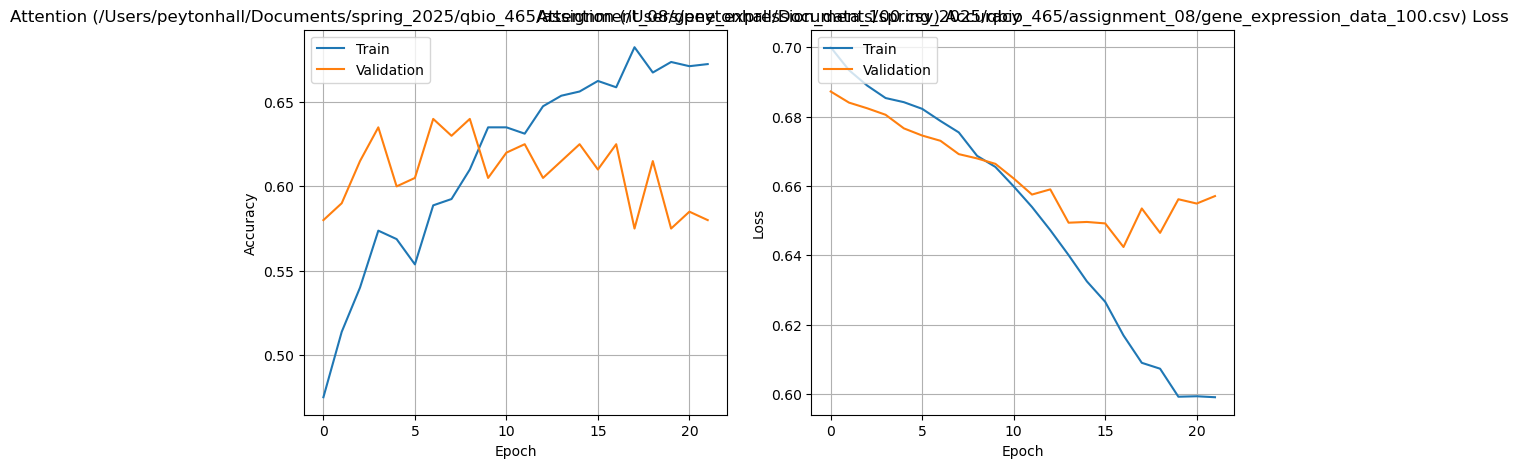

Epoch 1/50


/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4738 - loss: 0.7071 - val_accuracy: 0.5650 - val_loss: 0.6847
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7469 - loss: 0.6237 - val_accuracy: 0.5750 - val_loss: 0.6748
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8972 - loss: 0.5533 - val_accuracy: 0.6050 - val_loss: 0.6651
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9562 - loss: 0.4980 - val_accuracy: 0.6350 - val_loss: 0.6549
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9695 - loss: 0.4314 - val_accuracy: 0.6500 - val_loss: 0.6472
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9914 - loss: 0.3795 - val_accuracy: 0.6750 - val_loss: 0.6394
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9945 - loss: 0.3209 - val_accuracy: 0.6650 - val_loss: 0.6312
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9953 - loss: 0.2724 - val_accuracy: 0.6700 - val_loss: 0.6243
Epoch 9/50
7/7 ━━━

Attention - File: /Users/peytonhall/Documents/spring_2025/qbio_465/assignment_08/gene_expression_data_200.csv | Detected num_time_steps: 200, num_genes: 10
Attention Final validation accuracy for /Users/peytonhall/Documents/spring_2025/qbio_465/assignment_08/gene_expression_data_200.csv: 0.6750



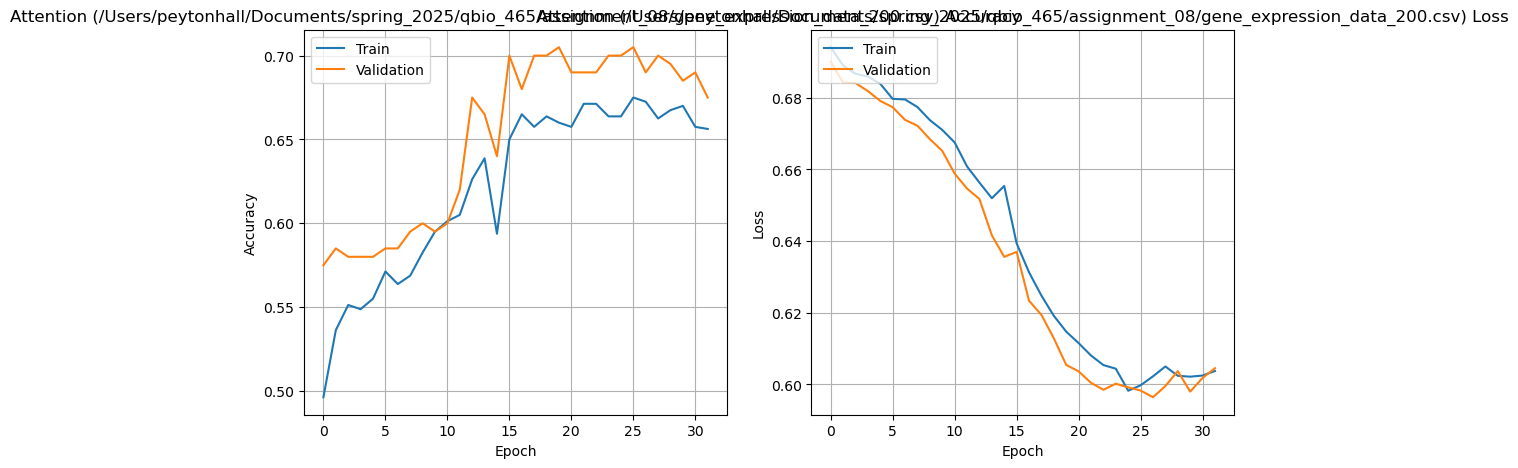

Epoch 1/50


/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4917 - loss: 0.7024 - val_accuracy: 0.5600 - val_loss: 0.6842
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8861 - loss: 0.5584 - val_accuracy: 0.6050 - val_loss: 0.6686
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9799 - loss: 0.4615 - val_accuracy: 0.6550 - val_loss: 0.6557
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9956 - loss: 0.3676 - val_accuracy: 0.6450 - val_loss: 0.6456
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9993 - loss: 0.2830 - val_accuracy: 0.6350 - val_loss: 0.6380
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9995 - loss: 0.2168 - val_accuracy: 0.6350 - val_loss: 0.6320
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.1614 - val_accuracy: 0.6400 - val_loss: 0.6281
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.1193 - val_accuracy: 0.6300 - val_loss: 0.6269
Epoch 9/50
7/7 ━━━

Attention - File: /Users/peytonhall/Documents/spring_2025/qbio_465/assignment_08/gene_expression_data_300.csv | Detected num_time_steps: 300, num_genes: 10
Attention Final validation accuracy for /Users/peytonhall/Documents/spring_2025/qbio_465/assignment_08/gene_expression_data_300.csv: 0.6600



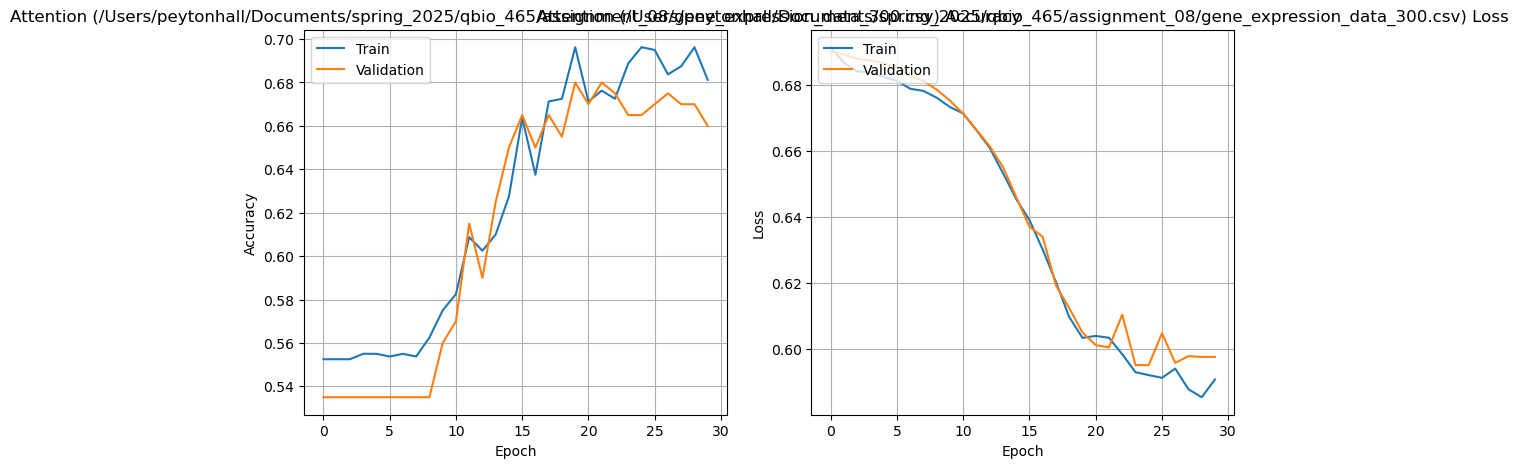

Epoch 1/50


/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5245 - loss: 0.6993 - val_accuracy: 0.5350 - val_loss: 0.6856
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9306 - loss: 0.5027 - val_accuracy: 0.5350 - val_loss: 0.6803
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9956 - loss: 0.3686 - val_accuracy: 0.5500 - val_loss: 0.6786
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.2670 - val_accuracy: 0.5600 - val_loss: 0.6811
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.1832 - val_accuracy: 0.5850 - val_loss: 0.6884
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.1232 - val_accuracy: 0.5750 - val_loss: 0.6982
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0847 - val_accuracy: 0.5750 - val_loss: 0.7099
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0608 - val_accuracy: 0.5700 - val_loss: 0.7223
Epoch 9/50
7/7 ━━━

In [7]:
import matplotlib.pyplot as plt


file_names = [
    '/Users/peytonhall/Documents/spring_2025/qbio_465/assignment_08/gene_expression_data_100.csv',
    '/Users/peytonhall/Documents/spring_2025/qbio_465/assignment_08/gene_expression_data_200.csv',
    '/Users/peytonhall/Documents/spring_2025/qbio_465/assignment_08/gene_expression_data_300.csv'
]

lstm_accs = []
attn_accs = []
labels = []  # to store time step labels (e.g., 100, 200, 300)

for file in file_names:
    print(f"\n========== Processing file: {file} ==========")

    # Extract time step value from file name (assuming format "gene_expression_data_{ts}.csv")
    ts_value = file.split('_')[-1].split('.')[0]
    labels.append(ts_value)


    # Train Attention model and collect final validation accuracy
    attn_model, attn_history = train_attention_model(file)
    attn_final_acc = attn_history.history['val_accuracy'][-1]
    attn_accs.append(attn_final_acc)
    plot_history(attn_history, title_prefix=f"Attention ({file})")
    
    # train lstm model and collect final validation accuracy
    df = pd.read_csv(file)
    y = df['Outcome'].values  
    X = df.drop('Outcome', axis=1).values 
    
    # reshape for LSTM as(samples, timesteps, features)
    num_features = X.shape[1]
    num_time_steps = 1  
    X = X.reshape(X.shape[0], num_time_steps, num_features)

    # split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # build and train LSTM model
    lstm_model = build_lstm_funct(input_shape=(num_time_steps, num_features), lstm_units=64, dropout_rate=0.2, learning_rate=0.001)
    lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))

    # final validation accuracy
    lstm_final_acc = lstm_history.history['val_accuracy'][-1]
    lstm_accs.append(lstm_final_acc)
    print(f"LSTM Final validation accuracy for {file}: {lstm_final_acc:.3f}")

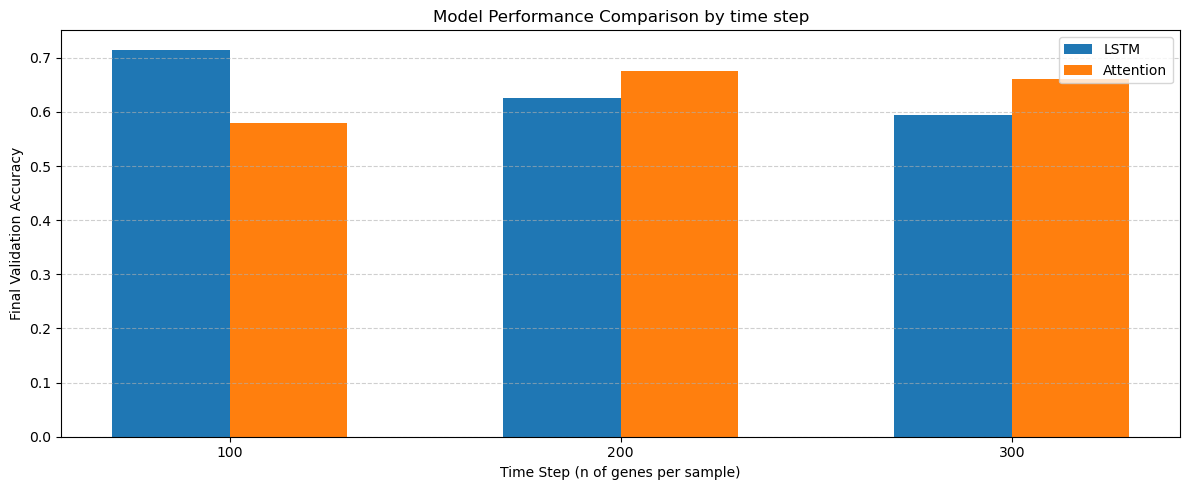

In [9]:
x = np.arange(len(labels))
width = 0.30

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(x-width/2, lstm_accs, width, label = 'LSTM')
ax.bar(x+width/2, attn_accs, width, label = 'Attention')

ax.set_ylabel('Final Validation Accuracy')
ax.set_xlabel('Time Step (n of genes per sample)')
ax.set_title('Model Performance Comparison by time step')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Q5: Analysis and Discussion [1 pts]

● Analyze how varying the sequence length (100, 200, and 300 time steps) affects the
performance of your models.

● Compare the performance of the LSTM and Attention-based models, and determine
which model performs better on longer sequences. Discuss potential reasons for your
observations, considering the differences in how each architecture processes temporal
information.

Increasing sequence length requires more computational power and so, takes longer and affects model peformance. Attention-based models seem to perform better on longer sequences whereas LSTM performs better on shorter sequences like 100 sequences.  This makes sense since LSTMs process sequentially and captures dependencies over time, which can lead to performance degradation on longer sequences (200, 300 time steps) due to the vanishing gradient issue. Attention-based models process input in parallel and can capture long-range dependencies, doing better with the vanishing gradient issue than LSTMs and so, are more effective with high-dimensional temporal data. 